In [1]:
import os
os.chdir('/Users/macbookfausto/Desktop/Tareas/Csv prueba')
print(os.getcwd())

/Users/macbookfausto/Desktop/Tareas/Csv prueba


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('rentas_coches_mexico.csv')
df.head(10)

,ID_Renta,Fecha_Renta,Fecha_Devolución,Ciudad,Estado,Marca,Modelo,Año_Vehículo,Tipo_Vehículo,Precio_Diario,Días_Renta,Monto_Total,Método_Pago,Cliente,Edad_Cliente,Seguro_Contratado,Agencia,Estado_Renta,Satisfacción_Cliente_%
0,1,2012-01-26,2012-02-03,Puebla,Puebla,BMW,Serie 5,2021,Lujo,2279,8,18232,Transferencia,Fernanda López,69,No,RentAuto MX,Finalizada,59
1,2,2020-04-08,2020-04-22,Guadalajara,Jalisco,Nissan,Altima,2021,Sedan,3768,14,52752,Efectivo,Ana Rodríguez,42,Sí,FlexDrive,En curso,52
2,3,2024-03-03,2024-03-05,Mérida,Yucatán,Mazda,CX-5,2015,SUV,2200,2,4400,Efectivo,María Gómez,41,Sí,CarMaster,Finalizada,69
3,4,2018-08-08,2018-08-17,Ciudad de México,CDMX,Ford,Escape,2019,Económico,4921,9,44289,Efectivo,Fernanda López,23,No,FlexDrive,Cancelada,98
4,5,2018-02-18,2018-02-21,Mérida,Yucatán,Hyundai,Tucson,2013,Pickup,2567,3,7701,App,Juan Pérez,52,No,RentAuto MX,Finalizada,97
5,6,2013-06-07,2013-06-15,Guadalajara,Jalisco,Ford,Ranger,2025,SUV,2550,8,20400,Transferencia,Laura Díaz,59,Sí,GoAuto,Cancelada,95
6,7,2018-08-25,2018-09-08,Ciudad de México,CDMX,Chevrolet,Onix,2016,Económico,4435,14,62090,Efectivo,José Hernández,26,Sí,CarMaster,Finalizada,59
7,8,2015-10-11,2015-10-19,Puebla,Puebla,Ford,Focus,2019,Económico,2575,8,20600,Tarjeta,Claudia Ruiz,22,Sí,DriveNow,Finalizada,72
8,9,2010-06-05,2010-06-12,Guadalajara,Jalisco,Nissan,Sentra,2013,Económico,1930,7,13510,App,Fernanda López,42,No,FlexDrive,En curso,86
9,10,2015-04-19,2015-04-25,Guadalajara,Jalisco,Hyundai,Tucson,2017,Lujo,4771,6,28626,Efectivo,Carlos Torres,60,Sí,SpeedCar,En curso,58


In [5]:
print('Existen', df.isnull().sum().sum(),'datos nulos ')

Existen 0 datos nulos 


In [7]:
#EDA 
df['Marca'].value_counts()


Nissan        60
Ford          60
Mazda         56
Hyundai       54
Kia           54
Toyota        48
BMW           46
Volkswagen    46
Chevrolet     39
Honda         37
Name: Marca, dtype: int64

In [12]:
df.columns

Index(['ID_Renta', 'Fecha_Renta', 'Fecha_Devolución', 'Ciudad', 'Estado',
       'Marca', 'Modelo', 'Año_Vehículo', 'Tipo_Vehículo', 'Precio_Diario',
       'Días_Renta', 'Monto_Total', 'Método_Pago', 'Cliente', 'Edad_Cliente',
       'Seguro_Contratado', 'Agencia', 'Estado_Renta',
       'Satisfacción_Cliente_%'],
      dtype='object')

In [13]:
df['Año_Vehículo'].value_counts()

2019    43
2021    37
2016    36
2012    35
2025    34
2022    33
2014    33
2020    32
2010    32
2024    30
2013    29
2018    29
2023    28
2015    27
2011    24
2017    18
Name: Año_Vehículo, dtype: int64

In [14]:
df['Agencia'].value_counts()

RentaFácil     73
GoAuto         71
DriveNow       70
FlexDrive      65
RentAuto MX    64
SpeedCar       59
CarMaster      50
AutoRent       48
Name: Agencia, dtype: int64

In [44]:
df_renta_f =df.loc[df['Agencia'] == 'RentaFácil']
df_renta_f.loc[df_renta_f['Estado_Renta']=='Cancelada'].sort_values(by='Seguro_Contratado', ascending= False)
df_renta_f_Pago = df_renta_f.loc[df_renta_f['Estado_Renta']=='Cancelada'].sort_values(by='Seguro_Contratado', ascending= False)
df_renta_f_Pago[['Método_Pago','Seguro_Contratado']].value_counts().sort_values(ascending=False)

Método_Pago    Seguro_Contratado
Tarjeta        Sí                   9
App            No                   6
Efectivo       No                   4
App            Sí                   3
Efectivo       Sí                   3
Transferencia  No                   3
               Sí                   3
Tarjeta        No                   2
dtype: int64

In [47]:
df_renta_f_Pago['Método_Pago'].value_counts()

Tarjeta          11
App               9
Efectivo          7
Transferencia     6
Name: Método_Pago, dtype: int64

In [56]:
print('los porcentajes en caso de que contraten seguro y cancelen son los siguientes : ','\n Tarjeta: ',(9/11)*100, '\n App: ',(3/9)*100, '\n Efectivo: ',(3/7)*100,  '\n Transferencia: ', (3/6)*100)

los porcentajes en caso de que contraten seguro y cancelen son los siguientes :  
 Tarjeta:  81.81818181818183 
 App:  33.33333333333333 
 Efectivo:  42.857142857142854 
 Transferencia:  50.0


In [57]:
df_renta_f['Tipo_Vehículo'].value_counts()

Lujo         17
Económico    16
Sedan        15
Pickup       13
SUV          12
Name: Tipo_Vehículo, dtype: int64

In [58]:
df_renta_f['Tipo_Vehículo'].count()

73

In [59]:
print('La probabilidad que contrate y cancelen por tipo de vehiculo: ', '\n Lujo: ',(17/73)*100 ,'\n Econo: ',(16/73)*100, '\n Seda:  ',(15/73)*100,'\n Pickup: ',(13/73)*100 ,
      '\n SUV: ',(12/73)*100)

La probabilidad que contrate y cancelen por tipo de vehiculo:  
 Lujo:  23.28767123287671 
 Econo:  21.91780821917808 
 Seda:   20.54794520547945 
 Pickup:  17.80821917808219 
 SUV:  16.43835616438356


In [74]:
df_cancelada = df.loc[df['Estado_Renta']== 'Cancelada']
df_cancelada_Renta_f = df_cancelada.loc[df['Agencia'] == 'RentaFácil']
df_cancelada_Renta_f.shape

(33, 19)

In [75]:
df_REnta_FF = df.loc[df['Agencia'] == 'RentaFácil']
df_REnta_FF['Estado_Renta'].shape

(73,)

In [76]:
print('La probabilidad de cancelacion en general es de: ', (165/500)*100, 'Mientras que una cancelacion para RENTA FACIL representa el: ',(33/73)*100)

La probabilidad de cancelacion en general es de:  33.0 Mientras que una cancelacion para RENTA FACIL representa el:  45.20547945205479


In [77]:
df.columns

Index(['ID_Renta', 'Fecha_Renta', 'Fecha_Devolución', 'Ciudad', 'Estado',
       'Marca', 'Modelo', 'Año_Vehículo', 'Tipo_Vehículo', 'Precio_Diario',
       'Días_Renta', 'Monto_Total', 'Método_Pago', 'Cliente', 'Edad_Cliente',
       'Seguro_Contratado', 'Agencia', 'Estado_Renta',
       'Satisfacción_Cliente_%'],
      dtype='object')

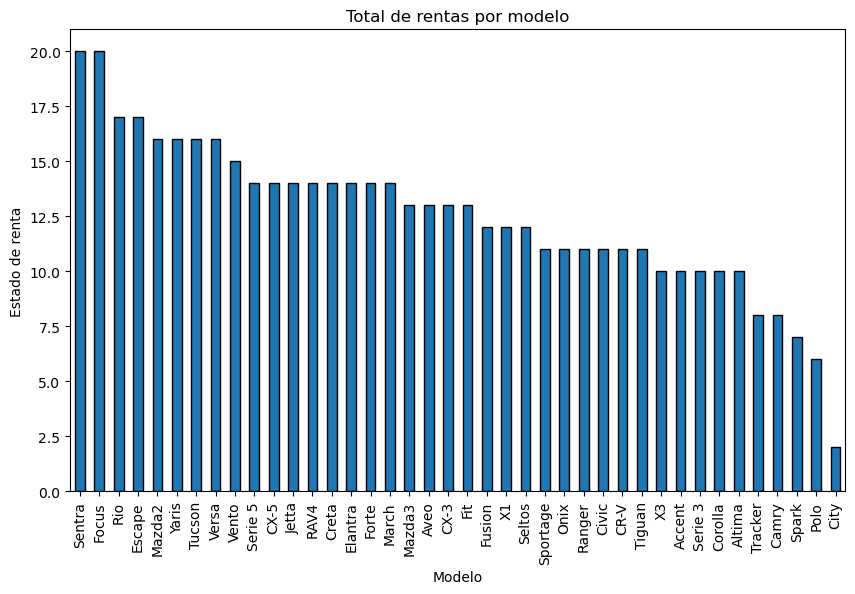

In [82]:
#Top 10 de Marcas mas rentadas
# Top 10 de Marcas por tipo de renta Economica, Lujo, etc. 

# Agrupar por país
df_grafica = df.groupby('Modelo')['Estado_Renta'].count().sort_values(ascending=False)

# Graficar
plt.figure(figsize=(10,6))
df_grafica.plot(kind='bar', edgecolor='black')

plt.title("Total de rentas por modelo")
plt.xlabel("Modelo")
plt.ylabel("Estado de renta")
plt.xticks(rotation=90)
plt.show()

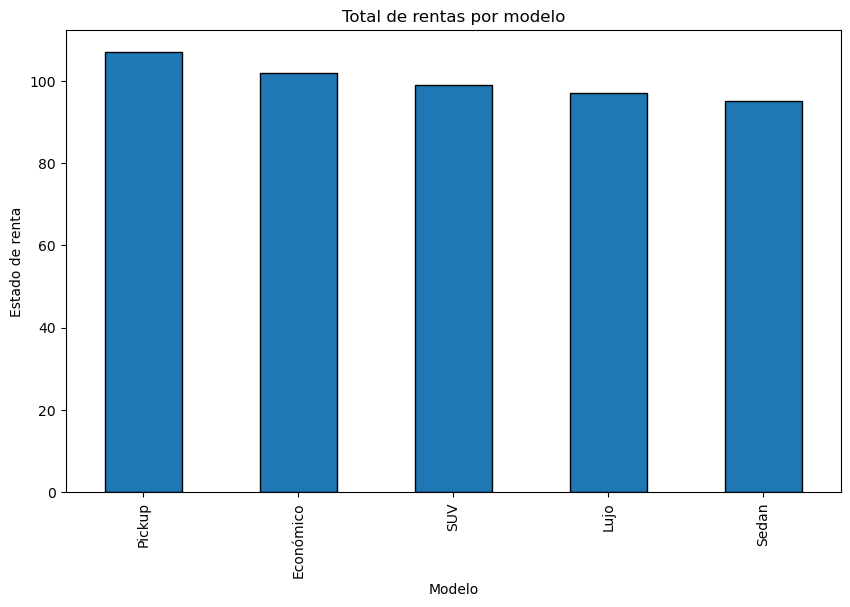

In [84]:
# Agrupar por país
df_grafica = df.groupby('Tipo_Vehículo')['Estado_Renta'].count().sort_values(ascending=False)

# Graficar
plt.figure(figsize=(10,6))
df_grafica.plot(kind='bar', edgecolor='black')

plt.title("Total de rentas por modelo")
plt.xlabel("Modelo")
plt.ylabel("Estado de renta")
plt.xticks(rotation=90)
plt.show()